In [8]:
import transbigdata as tbd
import pandas as pd
#读取数据    
data = pd.read_csv('TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','Time','Lng','Lat','OpenStatus','Speed'] 

#读取研究范围区域信息
import geopandas as gpd
sz = gpd.read_file(r'sz.json')

In [9]:
#数据预处理
#剔除研究范围外的数据
data = tbd.clean_outofshape(data, sz, col=['Lng', 'Lat'], accuracy=500)
#剔除出租车数据中载客状态瞬间变化的记录
data = tbd.clean_taxi_status(data, col=['VehicleNum', 'Time', 'OpenStatus'])

# 出租车GPS中提取OD

In [11]:
#从GPS数据提取OD
oddata = tbd.taxigps_to_od(data,col = ['VehicleNum','Time','Lng','Lat','OpenStatus'])
oddata

,VehicleNum,stime,slon,slat,etime,elon,elat
427075,22396,00:19:41,114.013016,22.664818,00:23:01,114.021400,22.663918
131301,22396,00:41:51,114.021767,22.640200,00:43:44,114.026070,22.640266
417417,22396,00:45:44,114.028099,22.645082,00:47:44,114.030380,22.650017
376160,22396,01:08:26,114.034897,22.616301,01:16:34,114.035614,22.646717
21768,22396,01:26:06,114.046021,22.641251,01:34:48,114.066048,22.636183
...,...,...,...,...,...,...,...
57666,36805,22:37:42,114.113403,22.534767,22:48:01,114.114365,22.550632
175519,36805,22:49:12,114.114365,22.550632,22:50:40,114.115501,22.557983
212092,36805,22:52:07,114.115402,22.558083,23:03:27,114.118484,22.547867
119041,36805,23:03:45,114.118484,22.547867,23:20:09,114.133286,22.617750


# OD集计（栅格）

<AxesSubplot:>

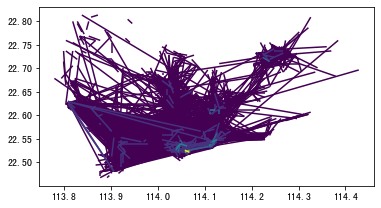

In [13]:
#定义研究范围
bounds = [113.6,22.4,114.8,22.9]
#获取栅格化参数
params = tbd.grid_params(bounds = bounds,accuracy = 500)
#栅格化OD并集计
od_gdf = tbd.odagg_grid(oddata,params)
od_gdf.plot(column = 'count')

## 加载底图

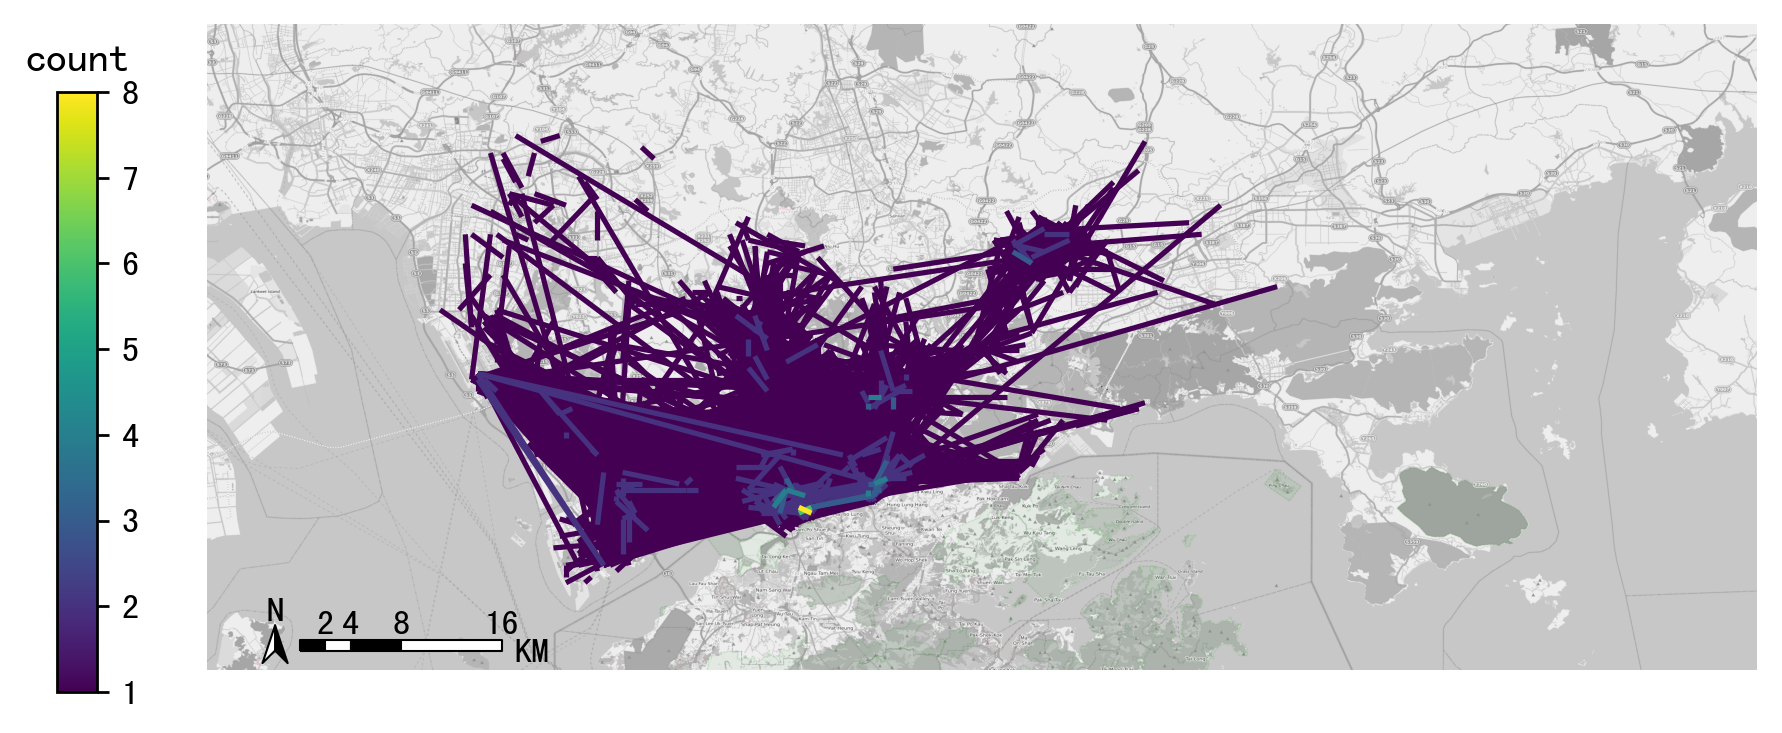

In [14]:
#创建图框
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=250)
ax =plt.subplot(111)
plt.sca(ax)
#添加地图底图
tbd.plot_map(plt,bounds,zoom = 12,style = 4)
#绘制colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('count')
plt.sca(ax)
#绘制OD
od_gdf.plot(ax = ax,column = 'count',cax = cax,legend = True)
#添加比例尺和指北针
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

# OD集计（小区）

<AxesSubplot:>

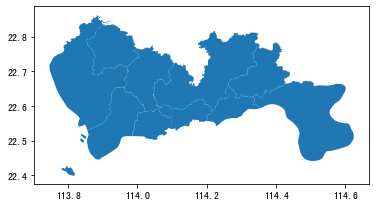

In [15]:
#读取区域信息
import geopandas as gpd
sz = gpd.read_file(r'sz.json')
sz.crs = None
sz.plot()

<AxesSubplot:>

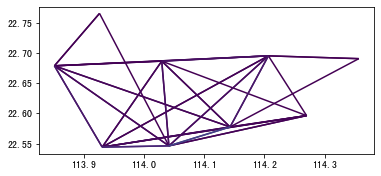

In [16]:
#OD集计到小区（在不传入栅格化参数时，直接用经纬度匹配）
od_gdf = tbd.odagg_shape(oddata,sz,round_accuracy=6)
od_gdf.plot(column = 'count')

<AxesSubplot:>

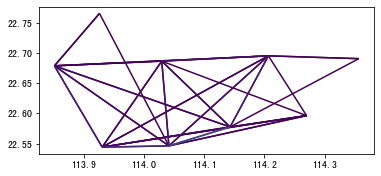

In [17]:
#OD集计到小区（传入栅格化参数时，先栅格化后匹配，可加快匹配速度，数据量大时建议使用）
od_gdf = tbd.odagg_shape(oddata,sz,params = params)
od_gdf.plot(column = 'count')

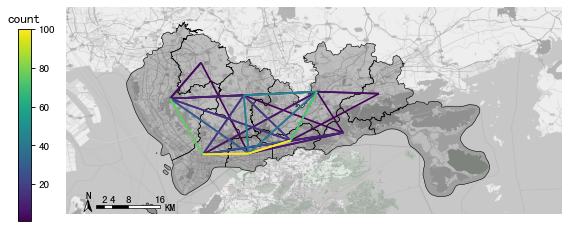

In [18]:
#创建图框
import matplotlib.pyplot as plt
import plot_map
fig =plt.figure(1,(8,8),dpi=80)
ax =plt.subplot(111)
plt.sca(ax)
#添加地图底图
tbd.plot_map(plt,bounds,zoom = 12,style = 4)
#绘制colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('count')
plt.sca(ax)
#绘制OD
od_gdf.plot(ax = ax,vmax = 100,column = 'count',cax = cax,legend = True)
#绘制小区底图
sz.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0.2),linewidths=0.5)
#添加比例尺和指北针
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()